<a href="https://colab.research.google.com/github/Trimmer23/IB_IA_2022/blob/main/FinalProject/Final_Project_Team3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONVOLUTIONAL NEURAL NETWORK FOR BRAIN TUMOR DETECTION

# Team #3
* **Gerardo Asael Trimmer López #1991899**
*  **Monserrat Nogueda Hernández #1877366**
*  **José Brayan Linares Gutiérrez #1992112**
*  **Samantha Itzel Salinas Sáenz 1845889**
*  **José Alejandro Luna Martínez #1919562**
*  **Guillermo Lazarín Cardenas #1991867**

# Libray importing

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
plt.style.use('classic')
import os


# Database importing form Keggle

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files 
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gerardotrimmer","key":"610d3692b2744ae676f35051817f8f07"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle


In [ ]:
#Copy kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#Permission from the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 73% 11.0M/15.1M [00:00<00:00, 111MB/s]
100% 15.1M/15.1M [00:00<00:00, 126MB/s]


In [ ]:
!unzip brain-mri-images-for-brain-tumor-detection

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

# Preprocessing of dataset


In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

# Where, 0 means Tumor and 1 means Normal

OneHotEncoder()

Now we create three lists so we are able to standarize the size of each image

*   Data for store data into a numpy array
*   Paths for store paths of each image
*   Result for store one hot encoded form of the classes





In [ ]:
#Lists where the data, paths and result will be placed respectively
data = []
paths = []
result = []

#Os.walk generates the file names in a directory tree by walking the tree either top-down or bottom-up.
for r, d, f in os.walk(r'../content/brain_tumor_dataset/yes'):
    for file in f:
        #The append function, will place new items in the available space of the list
          #os.path.join is used for common pathname manipulation so it will join one or more path components intelligently
           #Syntax: os.path.join(path, *paths), Where,"*" stands for a pointer
              #Then, *path represents the path components to be joined
              #Path is a string variable wich will contain '../content/brain_tumor_dataset/yes'
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
#We go through each image into the "Yes" folder that contains the images with tumor and we change its size to 128x128 
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    #Ponemos las imagenes en un array de la libreria numpy 
    img = np.array(img)
    if(img.shape == (128,128,3)):
        #Ponemos las imagnes en el array data
        data.append(np.array(img))
        #Ponemos el Onehotencoder en el array result
        result.append(encoder.transform([[0]]).toarray())
        


In [ ]:
len(paths)

86

In [ ]:
#Solo recreamos la lista paths porque data y result usaremos los anteriores
paths = []

#Then, we do the same with the "no" folder witch contains the no tumor MRIs

for r, d, f in os.walk(r'../content/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [ ]:
len(paths)

86

In [ ]:
# Now we are gonna convert the data as well as the result into a numpy array form because that is the input the model is gonna recive as an input

data = np.array(data)
data.shape


(139, 128, 128, 3)

In [ ]:
#Since the size of the data is 139x128x128 we reshape the result the same and the '2' it's because we only have 2 possible outputs
result = np.array(result)
result = result.reshape(139,2)

**Here we arrive to the part were we have to split our dataset into train and test in a randomizated way**

In [ ]:
#0.2 means 20% for test set
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size = 0.2, shuffle  = True, random_state = 0)

In [ ]:
x_train.shape

(111, 128, 128, 3)

# Convolutional Neural Network model creation 

In [ ]:
model = Sequential()

#32 Filters, Size Filters 2x2, Data size 128x128
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

#Herein we normalize the data since is more efficent for the model reducing the training epochs
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout for avoding overfitting
model.add(Dropout(0.25))

#64 Filters
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#Converting the images into one dimentional array
model.add(Flatten())

#Output layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#This last line of code we use only a 2 because there are only 2 possible outputs (0 - Tumor, 1 - No Tumor)
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", 
              optimizer='Adam', 
              metrics=['accuracy'])
#And now we print the summary of everything we coded
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
y_train.shape

(111, 2)

In [ ]:
#Herein we use the history for analyze the training 
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 16s 5s/step - loss: 16.7771 - accuracy: 0.5766 - val_loss: 5.2793 - val_accuracy: 0.7143
Epoch 2/30
3/3 [==============================] - 12s 4s/step - loss: 14.9455 - accuracy: 0.7027 - val_loss: 51.2429 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 4.5873 - accuracy: 0.8468 - val_loss: 15.5120 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 6.4334 - accuracy: 0.7748 - val_loss: 22.6055 - val_accuracy: 0.5357
Epoch 5/30
3/3 [==============================] - 8s 3s/step - loss: 2.4694 - accuracy: 0.9099 - val_loss: 9.2115 - val_accuracy: 0.6429
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 1.0459 - accuracy: 0.9459 - val_loss: 21.3973 - val_accuracy: 0.6071
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 1.9146 - accuracy: 0.9279 - val_loss: 20.1553 - val_accuracy: 0.6071
Epoch 8/30
3/3 [================

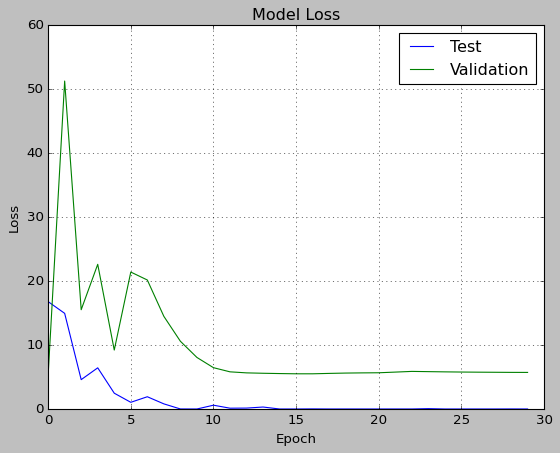

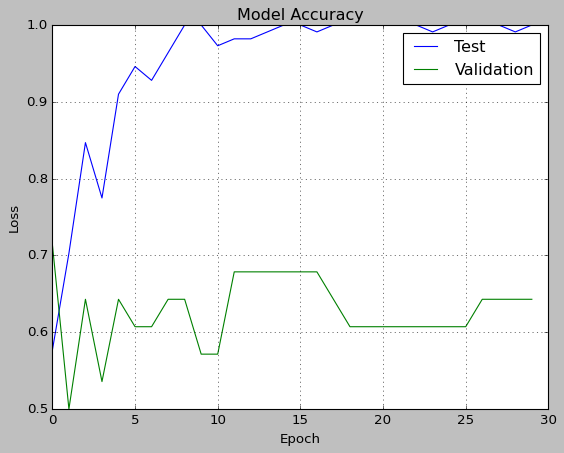

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.grid()
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.grid()
plt.show()

# Prediction

In [ ]:
def names(number):
    if number==0:
        return 'MRI shows a tumor'
    else:
        return 'MRI doesnt shows a tumor'

100.0% Confidence That the MRI doesnt shows a tumor


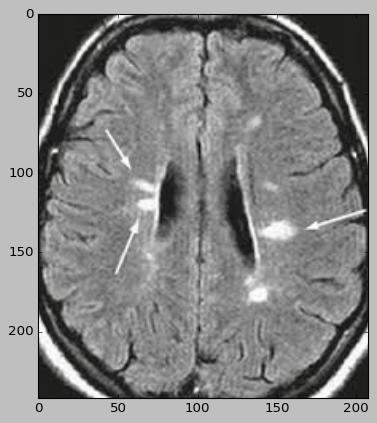

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/brain_tumor_dataset/no/30 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence That the ' + names(classification))

100.0% Confidence That the MRI shows a tumor


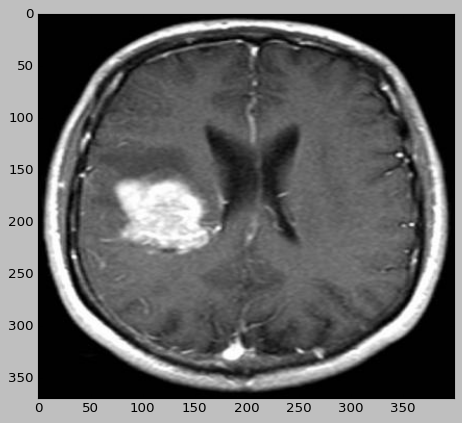

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"../content/brain_tumor_dataset/yes/Y11.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence That the ' + names(classification))